In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from datetime import datetime as dt

os.chdir('/home/s1332488/Chapter3')

In [2]:
df = pd.read_csv('metadataC.csv')

In [9]:
df[df.imaging_mode=='HS'][df.orbit_direction=='D'].incidence_angle.std()

/home/s1332488/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.006312189197722193

[Text(0, 0.5, 'Mean scence coherence'),
 Text(0.5, 0, 'Height of Ambiguity'),
 (0.0, 125.0)]

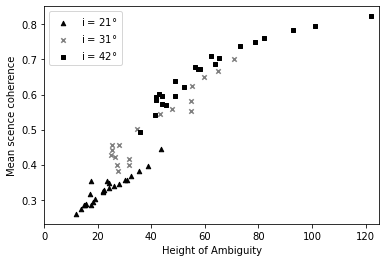

In [4]:
low = df[df.incidence_angle<25]
medium = df[(df.incidence_angle>=25)*(df.incidence_angle<=35)]
high = df[df.incidence_angle >35]

ax = plt.axes()
low.plot.scatter(x='hoa_abs',y='coh',ax=ax,
                 marker = '^',color='black',label='i = $21\degree$')
medium.plot.scatter(x='hoa_abs',y='coh',ax=ax,
                    marker='x',color='grey',label='i = $31\degree$')
high.plot.scatter(x='hoa_abs',y='coh',ax=ax,
                  marker='s',color='black',label='i = $42\degree$')

ax.set(ylabel='Mean scence coherence',
      xlabel='Height of Ambiguity',
      xlim=(0,125),)

In [5]:
df['z_err'] = 1 * np.sqrt(1-df.coh**2) / df.coh

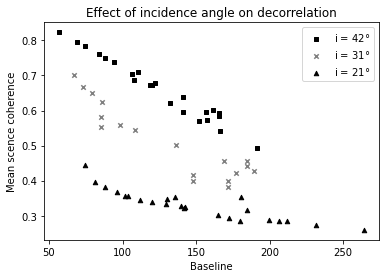

In [6]:
low = df[df.incidence_angle<25]
medium = df[(df.incidence_angle>=25)*(df.incidence_angle<=35)]
high = df[df.incidence_angle >35]

ax = plt.axes()
high.plot.scatter(x='baseline',y='coh',ax=ax,
                  marker='s',color='black',label='i = $42\degree$')
medium.plot.scatter(x='baseline',y='coh',ax=ax,
                    marker='x',color='grey',label='i = $31\degree$')
low.plot.scatter(x='baseline',y='coh',ax=ax,
                 marker = '^',color='black',label='i = $21\degree$')

ax.set(ylabel='Mean scence coherence',
      xlabel='Baseline',
      title='Effect of incidence angle on decorrelation')

plt.savefig('/home/s1332488/Chapter3/Figures/angle_decorr.png')